In [1]:
%matplotlib ipympl
from pianoq.misc.mplc_writeup_imports import *
dir_path = r'G:\My Drive\Projects\MPLC\results\lab\2024_10_30_make_mirror_work'

When I did the HG measurements I also fixed a bit the alignment, and that was probably a good thing to do after 3 months. Coming back to measure correlations, and used a dead_zone=450um, and linear tilt on plane 10 of 35 pixels per 2pi, and now of course with the new mask locations, and I get pretty nice looking correlations! 

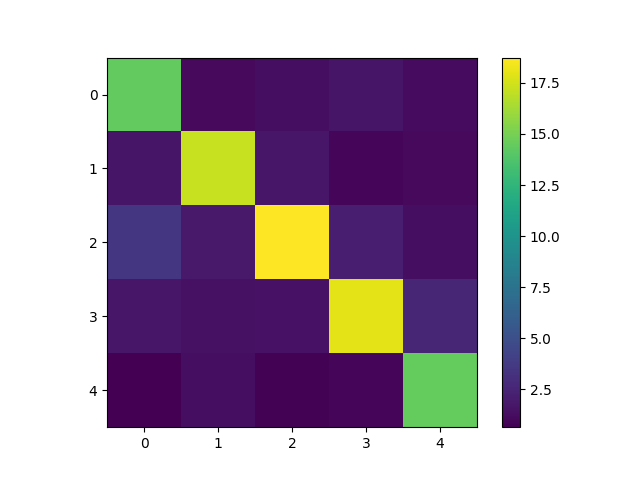

In [7]:
r = DiscreetScanResult(rf'{dir_path}\2024_10_31_11_59_45.dscan')
r.show(figshow=False)

Notice that the counts are significantly highe than what they used to be, by a factor of ~2-2.5! (I theoretically expected 4X, but this is not bad at all too.) 

The single counts looked a bit crooked (dz10=8), so now that the masks are aligned I thought maybe I should look again for the dz10...  

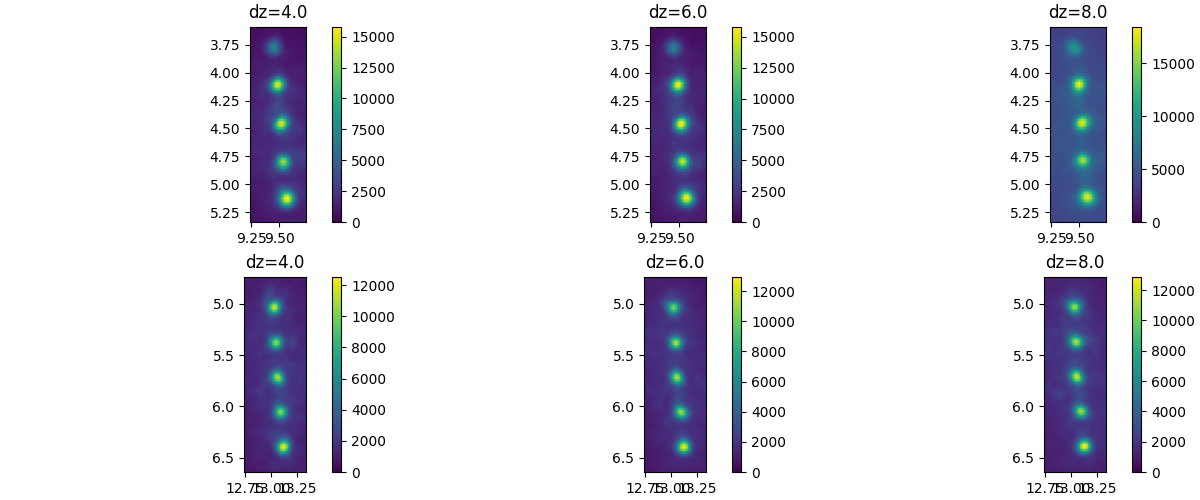

In [6]:
plt.close('all')
idl_paths = glob.glob(rf'{dir_path}\*fine*idler*.scan')
sig_paths = glob.glob(rf'{dir_path}\*fine*signal*.scan')

sig_ds = np.array([re.findall('.*dz10_(.*)mm.*.scan', path)[0] for path in sig_paths]).astype(float)
sig_ds, sig_paths = zip(*sorted(zip(sig_ds, sig_paths)))
# sig_ds, paths = sig_ds[1:], paths[1:]
sig_scans = [ScanResult(path) for path in sig_paths]

idl_ds = np.array([re.findall('.*dz10_(.*)mm.*.scan', path)[0] for path in idl_paths]).astype(float)
idl_ds, idl_paths = zip(*sorted(zip(idl_ds, idl_paths)))
# idl_ds, paths = idl_ds[1:], paths[1:]
idl_scans = [ScanResult(path) for path in idl_paths]

fig, axes = plt.subplots(2, len(idl_scans), figsize=(12, 5), constrained_layout=True)
for i in range(len(idl_scans)):
    sig = sig_scans[i]
    idl = idl_scans[i]
    # my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0, i], clim=[0, 21e3])
    my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0, i], clim=[0, None])
    # my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1, i], clim=[0, 15.5e3])
    my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1, i], clim=[0, None])
    axes[0, i].set_title(f'dz={idl_ds[i]}')
    axes[1, i].set_title(f'dz={sig_ds[i]}')

Let's choose some dz10, I don't think I will really find a very good dz10, and I had enough :P 

But - maybe a good thing to try is to do column-to-row instead of row-to-column, so I won't have trouble with the innermost spots. (See here the top spots in the top pictures, which is significantly dimmer.) I will try this since it is a good thing to try, though this causes a bit of trouble to have the 5 spots at the end a s a row, because the masks are tall more than wide. So it might not be perfect, and the best is with the D-mirror, I will get there at some point... If col_to_row won't fix it well, I am pretty sure I can have a significantly larger tilt at plane10, and it will be good enough... 

So bottom line:
- now the mirror still bothers (upper spot in upper panel)
- D-mirror will probably be the best final solution 
- col_to_row I will try on Sunday, and it might work pretty well (but it may have some problems, masks are taller than wide)
- adding more tilt on plane10 can probably also bring me almost all the way 